In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import date_interpreter
import datetime

In [4]:
nope = pd.read_csv(r'Data/Production_Data.csv',index_col=0)
date_interpreter.interpret_datestr(nope)

In [12]:
date_nope = nope.groupby(['Date']).mean()

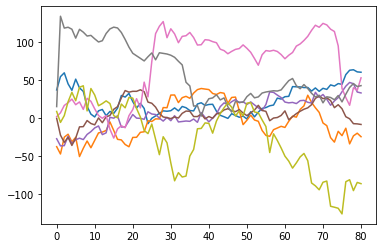

In [57]:
for i in range(10):
    tester = nope[nope['Date']==datetime.date(2020,1,i+2)][['Time','NOPE']]
    plt.plot(range(len(tester)),tester['NOPE'])

In [ ]:
# 0 timesteps = 9:35
# 20 timesteps = 11:15
# 40 timesteps = 12:55 (halfway through the day)
# 60 timesteps = 14:30
# 1 std = 47
# 2 std = 94

In [204]:
def filter_nope(hour, minute, std_threshold,save= False):
    time_filter = nope['Time'] == datetime.time(hour,minute)
    threshold_filter = abs(nope['NOPE']) > nope['NOPE'].std()*std_threshold
    filtered_df = nope[time_filter & threshold_filter][['Datetime','Date','Time','NOPE']]
    filtered_df['close_nope'] = [nope[(nope['Date']==row['Date']) & (nope['Time']==datetime.time(15,55))]['NOPE'].values[0] for i, row in filtered_df.iterrows()]
    
    if save == True:
        
        high_filtered_df = filtered_df[filtered_df['NOPE'] > 0]
        low_filtered_df = filtered_df[filtered_df['NOPE'] < 0]
        
        
        high_filtered_df['Datetime'].to_csv(f'high_{std_threshold}std_nope_{hour}_{minute}.csv')
        low_filtered_df['Datetime'].to_csv(f'low_{std_threshold}std_nope_{hour}_{minute}.csv')
        
    return filtered_df

In [205]:
for hour,minute in[(9,35),(11,15),(12,55),(14,30)]:
    for std in [1,2]:
            filter_nope(hour, minute, std,save= True)